# Sales Analysis📈

## Project Overview

### Objective
*The primary objective of this project was to analyze e-commerce sales data to uncover trends, optimize sales strategies, and support data-driven decision-making*.     
By examining customer purchasing behavior, seasonal demand, and product performance, the project aimed to:

• Identify the best-performing months to help businesses adjust inventory and marketing efforts.        
• Determine the most profitable cities to optimize regional sales strategies.                
• Analyze customer purchasing patterns to identify the best times for targeted advertising.            
• Discover product bundling opportunities to enhance cross-selling strategies.                
• Identify the best-selling products and understand demand drivers for better stock management.          

By leveraging data analysis techniques in Python, including Pandas for data wrangling, Matplotlib and Seaborn for visualizations, and statistical insights, this project provides a comprehensive overview of sales trends and actionable insights for business growth.

### Importing Libraries

In [429]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#### Merging 12 months of sales data into a single file

In [430]:
# Readind a single file

In [431]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

In [432]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [433]:
# Listing all files in a directory using listdir

In [434]:
files = [file for file in os.listdir("Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [435]:
# Concatenating files

In [436]:
files = [file for file in os.listdir("./Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv", index = False)

#### Reading Updated DataFrame

In [437]:
data = pd.read_csv("all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Basic Understanding of Data

In [438]:
data.shape

(186850, 6)

In [439]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [441]:
df.duplicated().sum()

73

In [442]:
df.isna().sum()

Order ID            40
Product             40
Quantity Ordered    40
Price Each          40
Order Date          40
Purchase Address    40
dtype: int64

In [443]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,11646,11646,11646,11646,11646,11646
unique,11208,20,7,24,9495,11032
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,17,1454,10490,1454,17,17


### Data Cleaning

In [444]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [445]:
nan_df = data[data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
data = data.dropna(how="all")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Finding "Or" and deleting it

In [447]:
data = data[data["Order Date"].str[0:2]!="Or"]

#### Correcting data types of Columns

In [448]:
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])
data.dtypes                                      

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Augment data with additional columns

#### Adding Months Column

In [449]:
data["Month"] = data["Order Date"].str[0:2]
#data["Month"] = data["Month"].astype("int32")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Adding Sales Column

In [450]:
data["Sales"] = data["Quantity Ordered"]*data["Price Each"]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


#### Adding State and City Column

In [451]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [452]:
data["City"] = data["Purchase Address"].apply(lambda x: get_city(x) + " ("  + get_state(x)+ ")")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


### Data Analysis

#### What was the best month for sales? How much was earned that month?

In [453]:
months = range(1,13)
y = data.groupby("Month").sum()["Sales"]

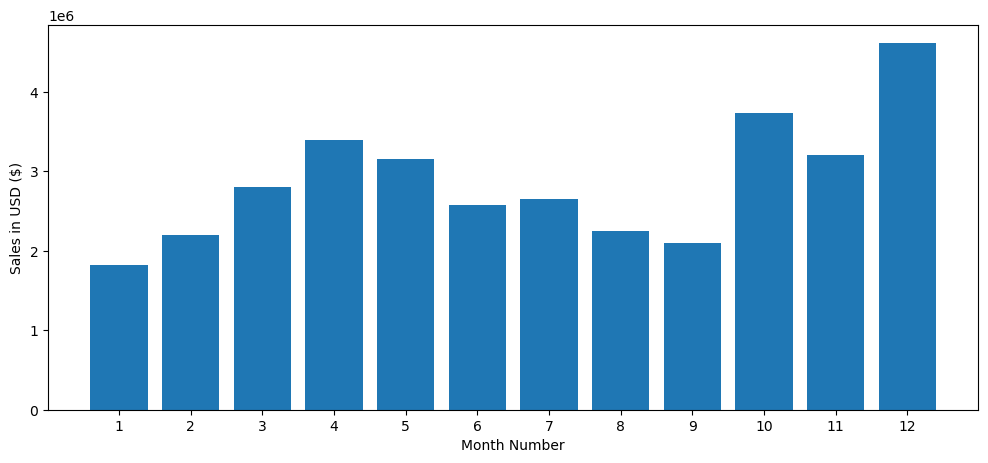

In [454]:
plt.figure(figsize=(12,5))
plt.bar(months,y)
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD ($)")
        
plt.show()

*Inference* : December month observed the highest number of sales with about 4M sales (4,613,443) while January month observed performed the worst with lowest number of sales incurred.

### What city had the highest number of sales?

In [455]:
cities = [city for city , df in data.groupby("City")]
y = data.groupby("City").sum()["Sales"]

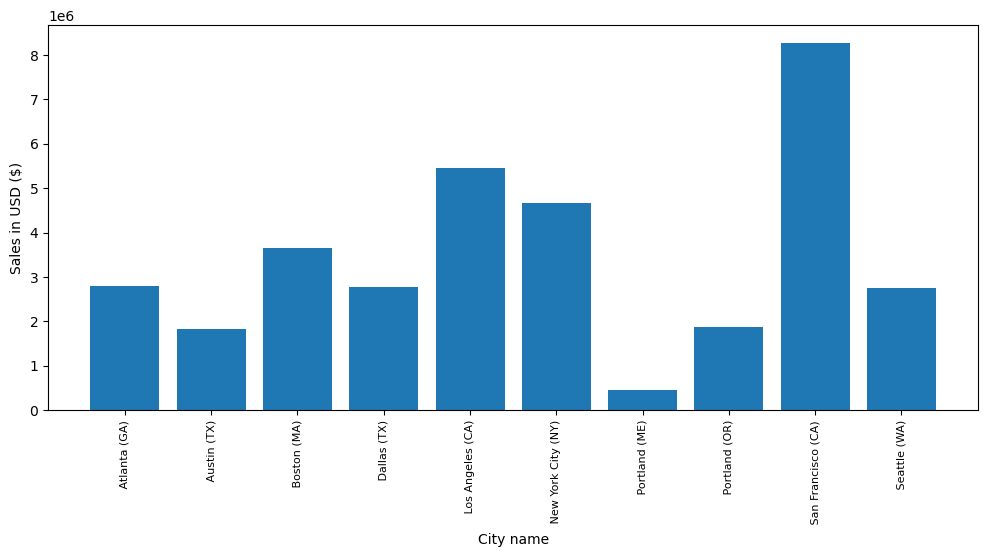

In [456]:
plt.figure(figsize=(12,5))
plt.bar(cities,y)
plt.xticks(cities,rotation=90,fontsize=8)
plt.xlabel("City name")
plt.ylabel("Sales in USD ($)")
        
plt.show()

*Inference* : San Francisco is the best performing city in the United States with 8262203 sales while the least performing one is Portland with 449758 sales.

In [457]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


#### Adding Hour and Minute Column

In [458]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


### What time should we display advertisements to maximize likelihood of customer's buying product?

In [459]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
131223,204288,Macbook Pro Laptop,1,1700.00,2019-05-14 10:50:00,"495 Walnut St, San Francisco, CA 94016",05,1700.00,San Francisco (CA),10,50
4555,180915,iPhone,1,700.00,2019-04-06 01:11:00,"157 Center St, Boston, MA 02215",04,700.00,Boston (MA),1,11
96510,214540,Bose SoundSport Headphones,1,99.99,2019-06-25 21:20:00,"767 River St, San Francisco, CA 94016",06,99.99,San Francisco (CA),21,20
124081,197505,AAA Batteries (4-pack),1,2.99,2019-05-07 00:16:00,"327 8th St, Los Angeles, CA 90001",05,2.99,Los Angeles (CA),0,16
178208,251071,AAA Batteries (4-pack),1,2.99,2019-09-14 21:17:00,"346 11th St, Portland, OR 97035",09,2.99,Portland (OR),21,17


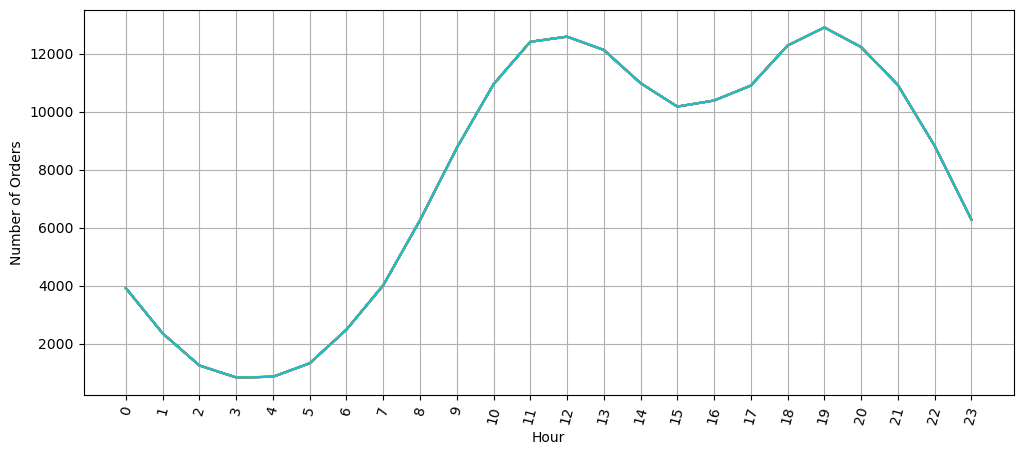

In [460]:
plt.figure(figsize=(12,5))
hours = [hour for hour , df in data.groupby("Hour")]
plt.plot(hours, data.groupby("Hour").count())
plt.xticks(hours,rotation=75)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")  
plt.grid()
        
plt.show()

*Inference* : Peaks are observed at around 11am and 7pm. So we should advertise maybe right before 11am or 6pm would be good time to display ads as those were the peaks of when all the orders in our dataset happened.

### What products are most often sold together?

In [461]:
df = data[data["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31


In [462]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x)) 
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [463]:
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


In [464]:
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', ' USB-C Charging Cable', ' Wired Headphones') 87
('iPhone', ' Lightning Charging Cable', ' Wired Headphones') 62
('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones') 47
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 35
('Vareebadd Phone', ' USB-C Charging Cable', ' Wired Headphones') 33
('iPhone', ' Apple Airpods Headphones', ' Wired Headphones') 27
('Google Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 24
('Vareebadd Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 16
(' USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones') 5
('Vareebadd Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 5


*Inference* : IPhone and Lightning Charging Cable are most often sold together as a combo of two while three items sold together oftenly were Google Phone, USB-C Charging Cable and Wired Headphones 

### What product sold the most? Why do you think it sold the most?

In [465]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


In [466]:
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
dtype: object

In [471]:
product_group = data.groupby("Product")
quantity_ordered = product_group.count()["Quantity Ordered"]

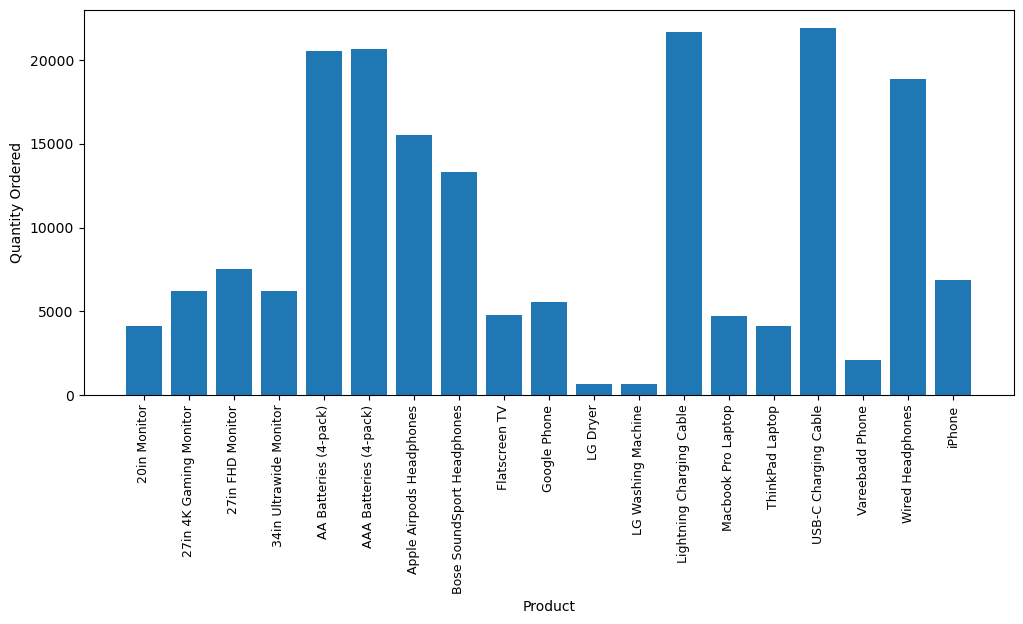

In [472]:
plt.figure(figsize=(12,5))
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation=90,fontsize=9)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
        
plt.show()

*Inference* : USB-C Charging Cable and Lightning Charging Cable were the most sold item followed by AAA Batteries and AA batteries, a pack of four.

### Key Insights & Findings:

*Peak Sales Trends* :
* December recorded the highest revenue (~$4.6M), suggesting holiday-driven demand and inventory stocking.
* January experienced the lowest sales, indicating an off-season slump and a need for post-holiday sales campaigns to boost revenue.

*Regional Sales Performance* :
* San Francisco led with $8.26M in sales, highlighting it as a prime market.
* Portland had the lowest sales, indicating potential for improved marketing efforts.
  
*Optimal Advertising Timing* :
* Peak customer activity was observed at 11 AM and 7 PM, recommending targeted ad placements before these hours.

*Product Bundling & Sales Trends* :
* The most frequently sold product pairs included iPhone & Lightning Cable and Google Phone & USB-C Cable, supporting cross-selling strategies.
* USB-C and Lightning Cables dominated sales, likely due to recurring tech accessory demand.


# Conclusion:

#### Through in-depth analysis, the project provides valuable insights into sales performance, seasonal demand, and consumer behavior. This analysis equips businesses with actionable strategies to refine their marketing strategies and enhace revenue, optimize product placements, and improve customer targeting. By leveraging these insights, companies can make informed decisions that drive revenue growth and enhance operational efficiency in the e-commerce sales.